In [41]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('data/test.csv')
df[0:3]

,Unnamed: 0,bid,ask,bid-volume,ask-volume,time
0,0,6475.77,6475.78,16.367245,9.221669,2018-06-13 23:13:23.297190
1,1,6475.77,6475.78,16.864365,8.221669,2018-06-13 23:13:23.801236
2,2,6475.77,6475.78,16.866155,8.221669,2018-06-13 23:13:24.304275


In [43]:
df['mid'] = (df['bid'] + df['ask']) / 2
df[0:3]

,Unnamed: 0,bid,ask,bid-volume,ask-volume,time,mid
0,0,6475.77,6475.78,16.367245,9.221669,2018-06-13 23:13:23.297190,6475.775
1,1,6475.77,6475.78,16.864365,8.221669,2018-06-13 23:13:23.801236,6475.775
2,2,6475.77,6475.78,16.866155,8.221669,2018-06-13 23:13:24.304275,6475.775


In [44]:
def shift_right(xs):
    ret = np.roll(xs, 1)
    ret[0] = 0
    return ret
print(np.arange(10))
print(shift_right(np.arange(10)))

[0 1 2 3 4 5 6 7 8 9]
[0 0 1 2 3 4 5 6 7 8]


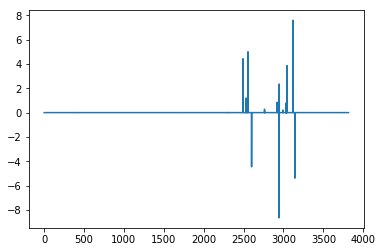

In [45]:
df['dmid'] = df['mid'] - shift_right(df['mid'])
plt.plot(df['dmid'][1:])

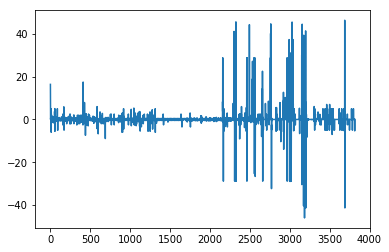

In [46]:
def get_bof(df):
    """bof := bid order flow"""
    bids = df['bid'].values
    sr_bids = shift_right(bids)
    bid_eq = (bids == sr_bids)
    bid_g = (bids > sr_bids)

    bid_vol = df['bid-volume'].values
    sr_bid_vol = shift_right(bid_vol)

    bof = bid_eq * (bid_vol - sr_bid_vol) + bid_g * bid_vol
    return bof

plt.plot(get_boi(df))

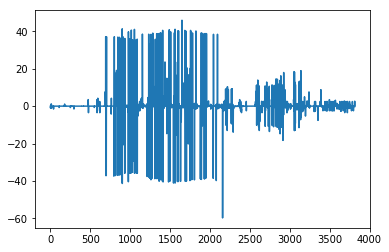

In [47]:
def get_aof(df):
    """aof := ask order flow"""
    asks = df['ask'].values
    sr_asks = shift_right(asks)
    ask_eq = (asks == sr_asks)
    ask_l = (asks < sr_asks)

    ask_vol = df['ask-volume'].values
    sr_ask_vol = shift_right(ask_vol)

    aof = ask_eq * (ask_vol - sr_ask_vol) + ask_l * ask_vol
    return aof

plt.plot(get_aof(df))

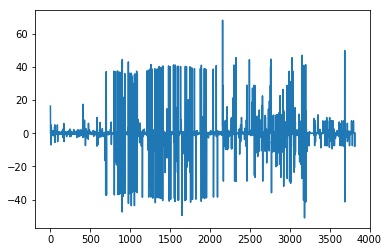

In [48]:
def get_oi(df):
    """oi := order imbalance,
    per http://eprints.maths.ox.ac.uk/1895/1/Darryl%20Shen%20(for%20archive).pdf"""
    oi = get_bof(df) - get_aof(df)
    return oi

df['oi'] = get_oi(df)
plt.plot(df['oi'])

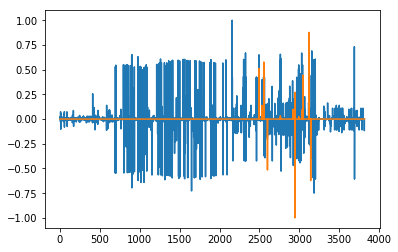

In [52]:
plt.plot(df['oi'][1:] / np.abs(df['oi'][1:]).max())
plt.plot(df['dmid'][1:] / np.abs(df['dmid'][1:]).max())